# #FullWave

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from rspie import loadfld
import cmasher as cm

## ##Tapered Waveguides

### ###Single waveguide launched from RSoft

In [28]:
extent, data = loadfld('C:/Synopsys/PhotonicSolutions/2022.09/RSoft/examples/FullWAVE/fwtmp.fld')

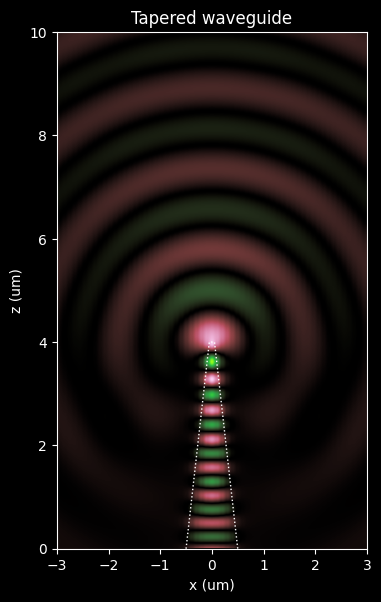

In [42]:
plt.figure(figsize=(4,8))
plt.imshow(data, cmap=cm.watermelon, origin='lower', extent=extent)
plt.plot([-0.5,-0.5/10,0.5/10,0.5],[0,4,4,0], 'w:', linewidth=1)
plt.xlabel('x (um)')
plt.ylabel('z (um)')
plt.title('Tapered waveguide')
plt.show()

## ##Calling simulations from Python

In [56]:
from subprocess import check_output
import os

In [173]:
def tapered_waveguide(config, simulscript):
    output_fname = '%s.fld' % config['prefix']
    work_dir = os.getcwd()
    cmd = ['fullwave', simulscript, 'wait=0']
    num_params = ['%s=%.1f' % (k, v) for k, v in config.items() if type(v) in [int, float, np.float64]]
    str_params = ['%s=%s' % (k, v) for k, v in config.items() if type(v) == str]
    cmd = cmd + num_params + str_params
    check_output(cmd, shell=True)
    fldfname = os.path.join(work_dir, output_fname)
    extent, data = loadfld(fldfname)
    return extent, data


In [192]:
config = {'top_width': 3.0, 
          'width'    : 1.0,
          'Length'   : 5.0,
          'grid_size': 0.1,
          'delta'    : 0.5,
          'free_space_wavelength': 1.55,
          'prefix': 'run1'}
simulscript = 'C:/Synopsys/PhotonicSolutions/2022.09/RSoft/examples/FullWAVE/wg-tapered.ind'
extent, data = tapered_waveguide(config, simulscript)

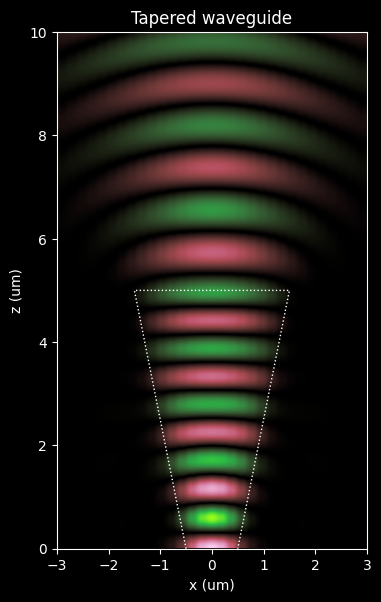

In [193]:
wg_contour = ([-config['width']/2,-config['top_width']/2,config['top_width']/2,config['width']/2], 
              [0, config['Length'], config['Length'], 0])
plt.figure(figsize=(4,8))
plt.imshow(data, cmap=cm.watermelon, origin='lower', extent=extent)
plt.plot(*wg_contour, 'w:', linewidth=1)
plt.xlabel('x (um)')
plt.ylabel('z (um)')
plt.title('Tapered waveguide')
plt.show()

In [194]:
config = {'top_width': 0.0, 
          'width'    : 1.0,
          'Length'   : 5.0,
          'grid_size': 0.1,
          'delta'    : 1.0,
          'free_space_wavelength': 1.55,
          'prefix'   : 'run1'}
simulscript = 'C:/Synopsys/PhotonicSolutions/2022.09/RSoft/examples/FullWAVE/wg-tapered.ind'

top_widths = np.linspace(0, 4, 10)
results = []
for top_width in top_widths:
    config['top_width'] = top_width
    config['prefix'] = 'run1'
    save_config = config.copy()
    extent, data = tapered_waveguide(config, simulscript)
    results.append((save_config, extent, data))

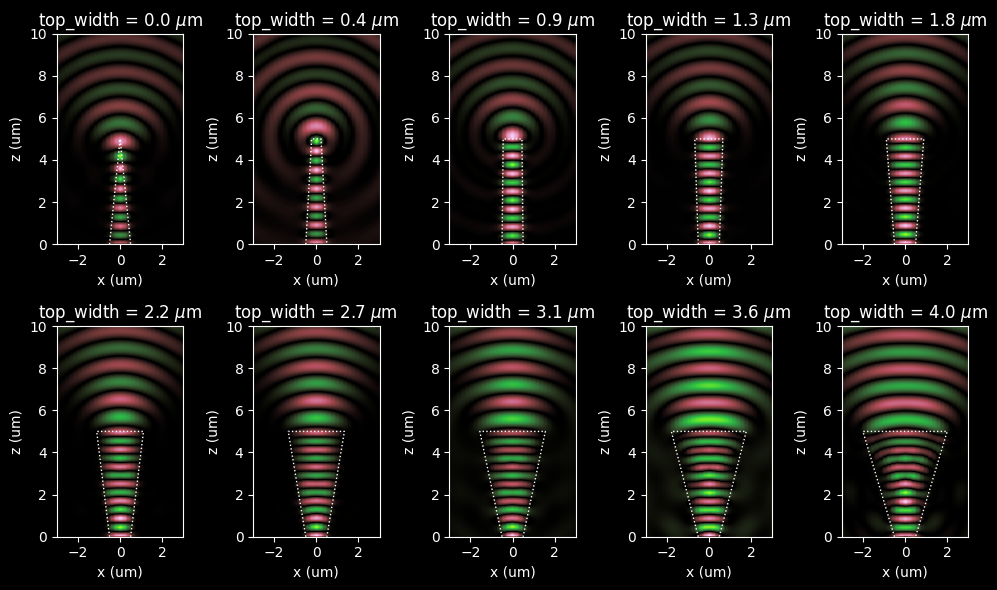

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,6))
for i, (config, extent, data) in enumerate(results):
    wg_contour = ([-config['width']/2,-config['top_width']/2,config['top_width']/2,config['width']/2], 
              [0, config['Length'], config['Length'], 0])
    ax = axes[i//5][i%5]
    ax.imshow(data, cmap=cm.watermelon, origin='lower', extent=extent)
    ax.plot(*wg_contour, 'w:', linewidth=1)
    ax.set_xlabel('x (um)')
    ax.set_ylabel('z (um)')
    ax.set_title('top_width = %.1f $\mu$m' % config['top_width'])
plt.tight_layout()
plt.show()